In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchaudio
from IPython.display import Audio
import torchaudio.transforms as T

In [ ]:
audio, sampling_rate = torchaudio.load('/content/Home.m4a')

Audio(audio,rate=sampling_rate)

In [ ]:
audio.shape,sampling_rate

(torch.Size([1, 756736]), 48000)

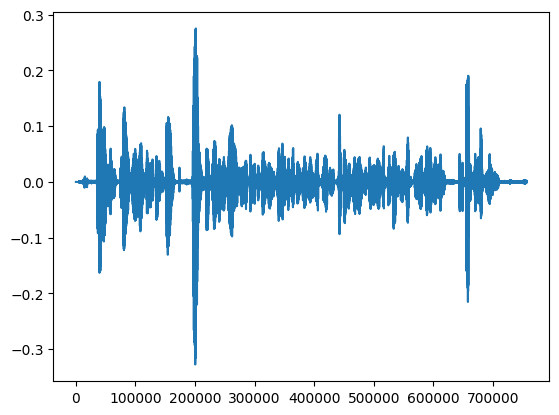

In [ ]:
plt.plot(audio.squeeze())

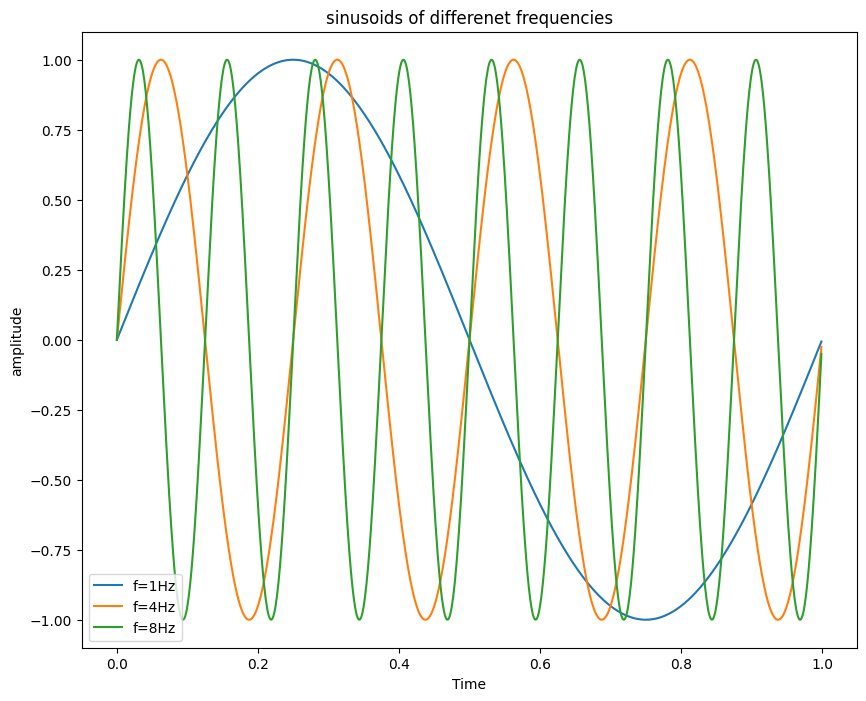

In [ ]:
#x axis
x = np.linspace(0,1,1000,endpoint=False)
# lets say our frequencies
f = [1,4,8] # in Hz

plt.figure(figsize=(10,8))

for i in f:
  y = np.sin(2* np.pi * i *x)
  plt.plot(x,y,label=f'f={i}Hz')

plt.xlabel('Time')
plt.ylabel('amplitude')
plt.title('sinusoids of differenet frequencies')
plt.legend()
plt.show()

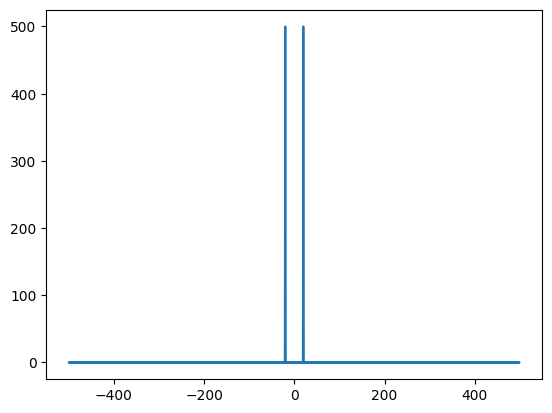

In [ ]:
# if we have a signal with freq 20 hz, then when we do fourier transform we see a spike at 20 hz and then zero elsewhere
x = np.linspace(0,1,1000,endpoint=False) # 1 sec, 1000 samples
f = 20 # single freq of 20 hz

y = np.sin(2 * np.pi * f * x)

y_fft = np.fft.fft(y)
freq = np.fft.fftfreq(len(x), d = 1/(len(x))) # it takes the no of samples and the spacing between any two samples

plt.plot(freq, np.abs(y_fft))

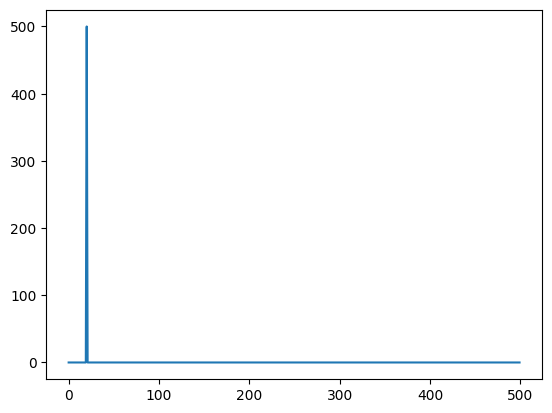

In [ ]:
# we dont care much about negative frequencies. so we can see that there is a spike at around 20 hz.
plt.plot(freq[:len(freq)//2], np.abs(y_fft[:len(y_fft)//2]))

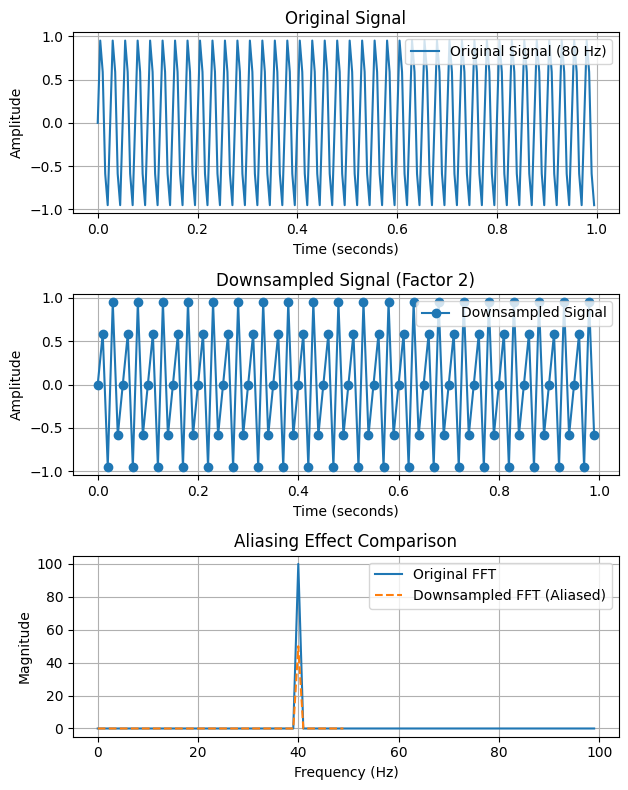

In [ ]:
t_high = np.linspace(0, 1, 200, endpoint=False)  # High-resolution time (1 second, 1000 samples)
f_original = 40  # Hz (Original frequency)

# Generate original sinusoid
y_high = np.sin(2 * np.pi * f_original * t_high)

# Compute Fourier Transform at high resolution
y_fft_high = np.fft.fft(y_high)
freqs_high = np.fft.fftfreq(len(t_high), d=t_high[1] - t_high[0])

# Downsampled version
downsample_factor = 2  # Reduce sampling rate by a factor of 4
t_low = t_high[::downsample_factor]
y_low = y_high[::downsample_factor]

# Compute Fourier Transform at lower sampling rate
y_fft_low = np.fft.fft(y_low)
freqs_low = np.fft.fftfreq(len(t_low), d=t_low[1] - t_low[0])

# Plot results
plt.figure(figsize=(12, 8))

# Original signal
plt.subplot(3, 2, 1)
plt.plot(t_high, y_high, label='Original Signal (80 Hz)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.legend()
plt.grid(True)

# Downsampled signal
plt.subplot(3, 2, 3)
plt.plot(t_low, y_low, 'o-', label='Downsampled Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title(f'Downsampled Signal (Factor {downsample_factor})')
plt.legend()
plt.grid(True)


# Highlight aliasing effect
plt.subplot(3, 2, 5)
plt.plot(freqs_high[:len(freqs_high)//2], np.abs(y_fft_high[:len(freqs_high)//2]), label='Original FFT')
plt.plot(freqs_low[:len(freqs_low)//2], np.abs(y_fft_low[:len(freqs_low)//2]), '--', label='Downsampled FFT (Aliased)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Aliasing Effect Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### so if we downsample at rate lower than nyquist rate , alising effect is seen and we wont find the frequency at desired location in frequency domain.but if the downsample rate is within the nyquist rate then though the magnitude of the engergy is low , the freq is exactly what we wanted.

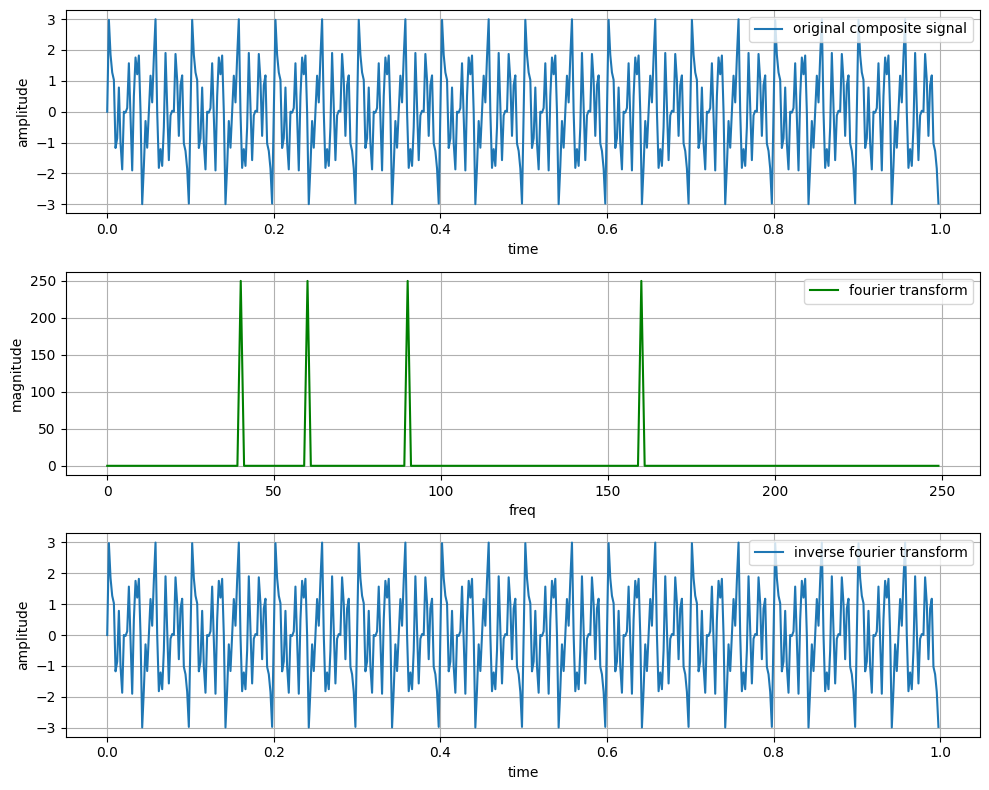

In [ ]:
# lets see fourier transform on composition of frequencies signal
t = np.linspace(0,1,500,endpoint=False)

# frequencies
f = [40,60,90, 160]

# composite sinusoidal signal
comp_y = np.zeros_like(t)

for i in f:
  y = np.sin(2 * np.pi * i * t)
  comp_y += y


# frequencies discrete
freq = np.fft.fftfreq(len(t), d = t[1]-t[0])

# fourier transform
y_fft = np.fft.fft(comp_y)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(t,comp_y, label = 'original composite signal')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(freq[:len(freq)//2], np.abs(y_fft[: len(y_fft)//2]), label = 'fourier transform',color='g')
plt.xlabel('freq')
plt.ylabel('magnitude')
plt.legend()
plt.grid()

# inverse fourier transform
inv_comp_y = np.fft.ifft(y_fft).real
plt.subplot(3,1,3)
plt.plot(t,inv_comp_y,label='inverse fourier transform')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### till now we either had time domain representation or frequency domain representation, the better representation would ofcourse be if we could somehow be able to have a middle ground i.e a representation of both time and frequency. That is exactly what spectrograms give us.

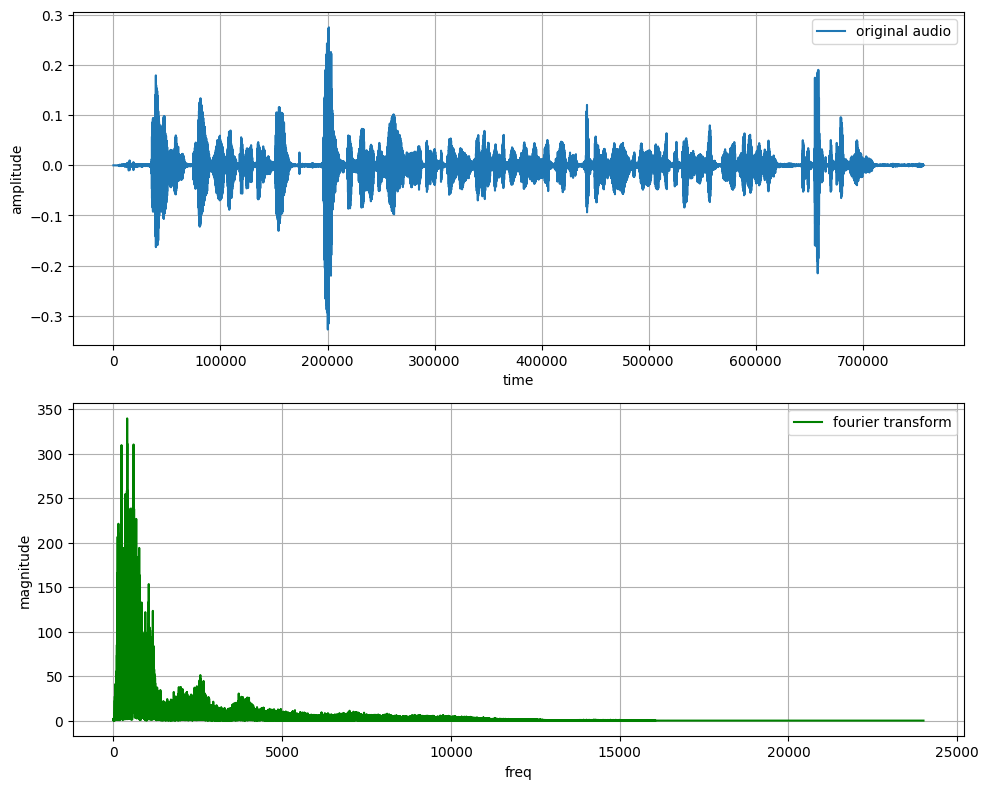

In [ ]:
# torch audio has pre built in functions to work with spectrogram . lets apply them for our audio.
# before that lets just see how normal fourier transform works for our audio
# lets see fourier transform on composition of frequencies signal

# original audio
y = audio.squeeze()
# frequencies discrete
freq = np.fft.fftfreq(len(y), d = 1/sampling_rate)

# fourier transform
y_fft = np.fft.fft(y)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(y, label = 'original audio')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(freq[:len(freq)//2], np.abs(y_fft[: len(y_fft)//2]), label = 'fourier transform',color='g')
plt.xlabel('freq')
plt.ylabel('magnitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# also we can notice that our audio is not as straight forward as our composite signal.

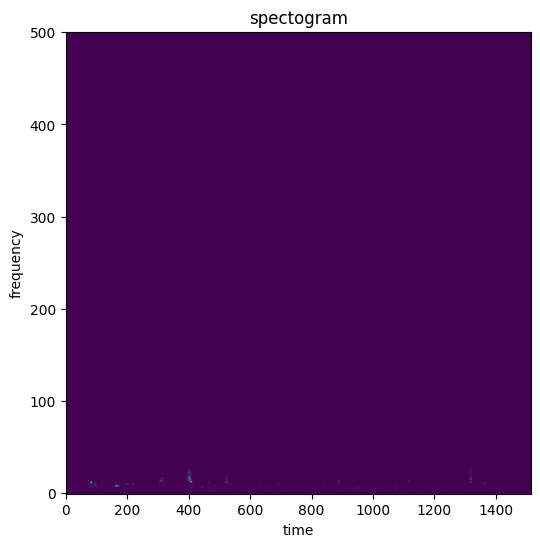

In [ ]:
# spectrogram
# lets use torch audio transform to transform our audio into spectrogram
y = audio.squeeze()
transform = T.Spectrogram(n_fft = 1000, hop_length = 500)
spectogram = transform(y)

plt.figure(figsize=(6,6))
plt.imshow(spectogram, aspect='auto', origin='lower')
plt.xlabel('time')
plt.ylabel('frequency')
plt.title('spectogram')
plt.show()


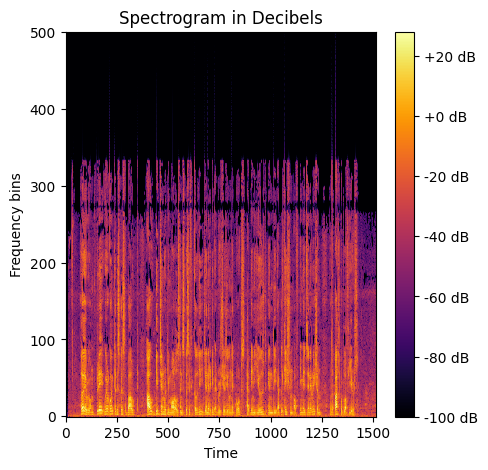

In [ ]:
db_transform = T.AmplitudeToDB()
db_spec = db_transform(spectogram)

# Plot the decibel spectrogram
plt.figure(figsize=(5, 5))
plt.imshow(db_spec.numpy(), cmap='inferno', origin='lower',aspect='auto', interpolation='none')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram in Decibels")
plt.ylabel("Frequency bins")
plt.xlabel("Time")
plt.show()

In [ ]:
# instead of spectrogram we usually use mel-spectrogram, just the scaled version that is more consistent with human`s audio perceiving nature
# human ear doesnot perceive sound linearly, like The difference between 100 Hz and 200 Hz sounds much larger
# than the difference between 1000 Hz and 1100 Hz. so a new scale called Melody i.e mel scale was introduced.
# just to see the perceiving nature of humans

# lets create a sample audio

freq = 1200
samples_per_second = 44100
duration = 10.0

t = np.arange(int(duration * samples_per_second)) / samples_per_second

waveform = np.sin(2 * np.pi * freq * t)
Audio(waveform, rate = samples_per_second)

# thus we observe high change when the frerquencies are changed at lower level thatn at higher level even though the rate of chagne is the same

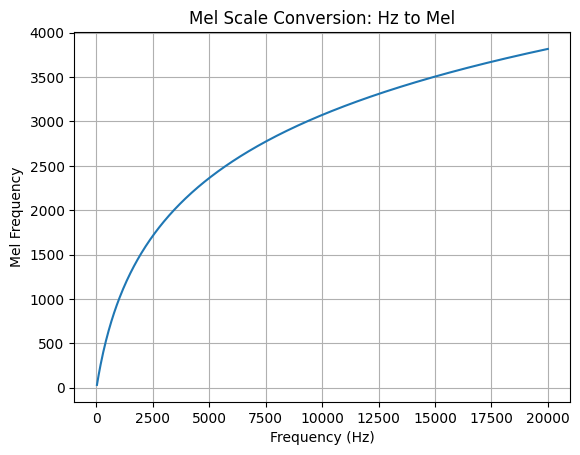

In [ ]:
# the mel scale looks like
def hz_to_mel(f):
    return 1127 * np.log(1 + f / 700)

frequencies = np.linspace(20, 20000, 500)
mel_frequencies = hz_to_mel(frequencies)

plt.plot(frequencies, mel_frequencies)
plt.title('Mel Scale Conversion: Hz to Mel')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mel Frequency')
plt.grid(True)

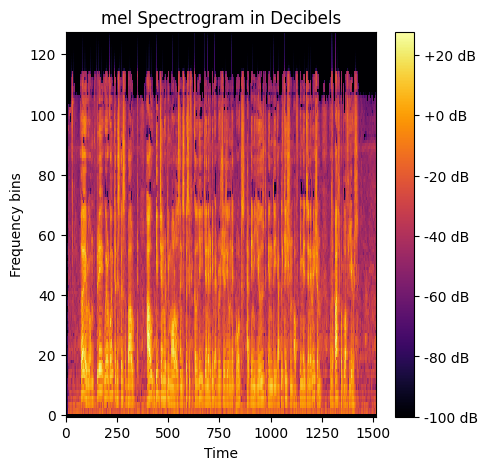

In [ ]:
# creating mel spectrogram from our audio
transform = T.MelSpectrogram(
    sample_rate = sampling_rate,
    n_fft = 1000,
    hop_length = 500,
    n_mels = 128,
)

mel_spec = transform(audio.squeeze())

db_transform = T.AmplitudeToDB()
db_spec = db_transform(mel_spec)

# Plot the decibel spectrogram
plt.figure(figsize=(5, 5))
plt.imshow(db_spec.numpy(), cmap='inferno', origin='lower',aspect='auto', interpolation='none')
plt.colorbar(format="%+2.0f dB")
plt.title("mel Spectrogram in Decibels")
plt.ylabel("Frequency bins")
plt.xlabel("Time")
plt.show()
